In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 讀取數據集
data = pd.read_csv('train.csv')

# 選擇特徵和目標變量
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

# 處理缺失值和類別特徵
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 將類別特徵轉換成獨熱編碼
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

# 將數據集分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化 XGBoost 分類器
model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# 訓練模型
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

[17:04:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8212290502793296


/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
import pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [11]:
import pickle

# 從 Pickle 文件中載入模型
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 使用載入的模型進行預測
y_pred = loaded_model.predict(X_test)

Confusion Matrix:
[[94 11]
 [21 53]]


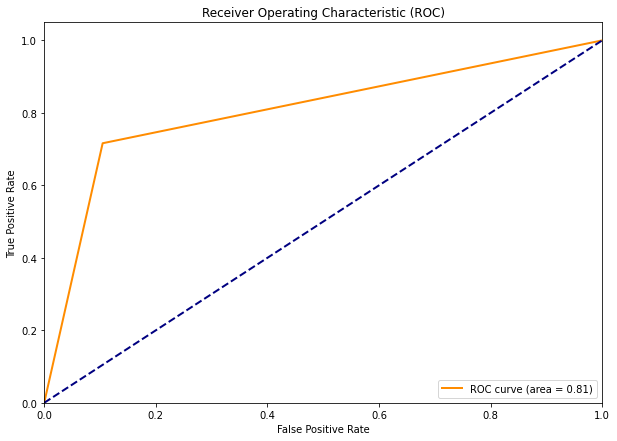

Accuracy: 0.8212290502793296


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 計算真陽性率、偽陽性率和閾值
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 繪製 ROC 曲線
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [13]:
clf = loaded_model.get_booster()
print(clf.feature_names)   
print(type(clf))

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_1', 'Embarked_2']
<class 'xgboost.core.Booster'>


In [14]:
new_order = ['Embarked_2','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_1']
X_test = X_test[new_order]
X_test

,Embarked_2,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_1
709,0,3,0,28.0,1,1,15.2458,0
439,1,2,0,31.0,0,0,10.5000,0
840,1,3,0,20.0,0,0,7.9250,0
720,1,2,1,6.0,0,1,33.0000,0
39,0,3,1,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...,...
433,1,3,0,17.0,0,0,7.1250,0
773,0,3,0,28.0,0,0,7.2250,0
25,1,3,1,38.0,1,5,31.3875,0
84,1,2,1,17.0,0,0,10.5000,0
